In [1]:
import sys
import numpy as np

# Include the parent directory in package searching path.
sys.path.append("../")

from utils import plot_series
from matplotlib import pyplot as plt

np.random.seed(0)

## Markov Chain and Stationary Distribution

Suppose we use a Markov Chain to model the employment of new-grad in IT job market. We propose the following **transition matrix**, $A$:


|             | Unemployed  | Seeking | Working |
|-------------|-------------|---------|---------|
| Unemployed  | 0.2         | 0.8     | 0.0     |
| Seeking     | 0.1         | 0.6     | 0.3     |
| Working     | 0.1         | 0.1     | 0.8     |

Here, $A_{ij} = p(s_{t} = j | s_{t-1} = i)$, for example, the probability that an unemployed new-grad seeks a job is 0.8; the probability of a job seeker getting a job is 0.3. We assume there's no jump from Unemployed directly to Working, i.e. no nepotism :)

We also have some prior knowledge about the states at time 0, that is: the majority of students after graduation will seek a job, only a few of them have a job secured before graduation, and only a few will choose to live a different life - travelling the world - for instance.

Hence, we have a **prior distribution** of the states of the chain. $\pi_{0} = [0.1\;\; 0.7\;\; 0.2]$, note that this is a row vector.

**Objective**: study how the distribution of employment changes over time, i.e. what is $\pi_{t}$.

Let $\pi_t(j) = p(s_{t} = j)$, i.e. $\pi_{t}(\text{Working}) =$ at time $t$, the probability that people start Working.

$$
\begin{align}
\pi_t(j) &= \sum_{i} p(x_{t}=j|x_{t-1}=i)\pi_{t-1}(i) \\
       &= \sum_{i} A_{ij} \pi_{t-1}(i)\\
\end{align}
$$

Therefore, $\pi_{t} = \pi_{t-1} A$, more over, $\pi_{t} = \pi_{0} A^t$.

In [2]:
class StationaryDiscreteMarkovChain:
    
    def __init__(self, transition_matrix, prior, epoch=100):
        self.A = transition_matrix
        self.pi_0 = prior[:]
        self.pi_t = prior[:]
        self.curr_epoch = 0
        self.targer_epoch = epoch
    
    def step(self):
        self.pi_t = self.pi_t @ self.A
        self.curr_epoch += 1
        return self.pi_t
    
    def __iter__(self):
        return self
    
    def __next__(self):
        if self.curr_epoch < self.targer_epoch:
            return self.step()
        else:
            raise StopIteration

In [3]:
# we want to see the distribution after 30 time steps
epoch = 30

transition_matrix = np.array([[0.2, 0.8, 0.0], [0.1, 0.6, 0.3], [0.1, 0.1, 0.8]])
prior = np.array([0.1, 0.7, 0.2])
record = prior[:]

for pi in StationaryDiscreteMarkovChain(transition_matrix, prior, epoch=30):
    record = np.vstack((record, pi))

### Visualize the distribution after 30 time steps.

We can see that the distribution $\pi$ converges as time progresses, and this $\pi$ is called **stationary distribution**.

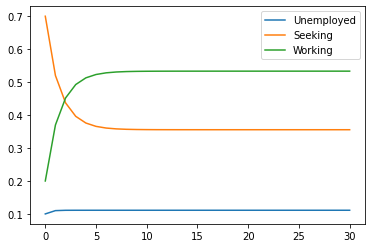

In [4]:
x = np.arange(31)
plt.plot(x, record[:,0], label="Unemployed")
plt.plot(x, record[:,1], label="Seeking")
plt.plot(x, record[:,2], label="Working")
plt.legend()
plt.show()

### Independent of starting distribution/prior

For different prior distribution, the Markov Chain always converges to a stationary distribution.

[0.11111111 0.35555556 0.53333333]
[0.11111111 0.35555556 0.53333333]
[0.11111111 0.35555556 0.53333333]
[0.11111111 0.35555556 0.53333333]
[0.11111111 0.35555556 0.53333333]


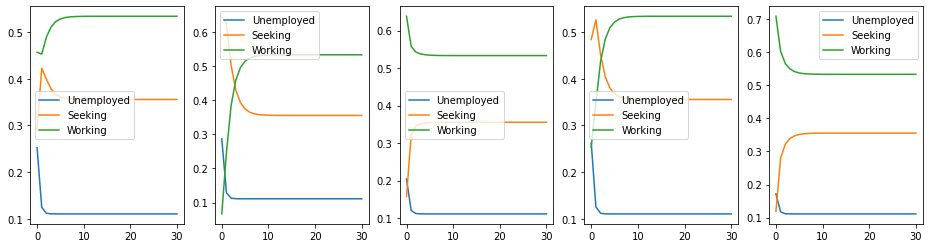

In [10]:
fig, ax = plt.subplots(1, 5)
for i in range(5):
    prior = np.random.rand(3)
    prior = prior / np.sum(prior)
    record = prior[:]
    for pi in StationaryDiscreteMarkovChain(transition_matrix, prior, epoch=30):
        record = np.vstack((record, pi))
    print(record[-1])
    ax[i].plot(x, record[:,0], label="Unemployed")
    ax[i].plot(x, record[:,1], label="Seeking")
    ax[i].plot(x, record[:,2], label="Working")
    ax[i].legend()
fig.set_figwidth(16)

1.0